In [1]:
import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Bidirectional 
from keras import Model
from keras import optimizers
from tensorflow import keras

In [2]:
data_full = pd.read_csv('Daily Volatility Dataset.csv')

In [3]:
X = data_full[["Volume", "Return", "Return_Squared", "EMAF", "Daily Volatility"]]
Y = data_full["target"]
data_set = data_full[["Volume", "Return", "Return_Squared", "EMAF", "Daily Volatility", "target"]]

In [4]:
splitlimit = int(len(data_set)*0.8)
training_features, test_data = data_set[:splitlimit], data_set[splitlimit:]

In [5]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
training_data_features_scaled = scaler1.fit_transform(training_features[["Volume", "Return", "Return_Squared", "EMAF", "Daily Volatility"]])
dataset_scaled = scaler2.fit_transform(training_features)

In [6]:
Z = []

backcandles = 10

for j in range(5):
    Z.append([])
    for i in range(backcandles, training_data_features_scaled.shape[0]):
        Z[j].append(training_data_features_scaled[i-backcandles:i, j])

In [7]:
Z = np.moveaxis(Z, [0], [2])

In [8]:
Z, yi = np.array(Z), np.array(dataset_scaled[backcandles-1:, -1])

In [9]:
y_final = np.reshape(yi,(len(yi),1))
y_final = y_final[:-1]

In [13]:
#Random Search and Walk-Forward Cross-Validation


from keras.models import load_model
from sklearn.model_selection import ParameterSampler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Activation
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import numpy as np
from scipy.stats import randint, uniform


def create_model(units=80):
    lstm_input = Input(shape=(backcandles, 5), name='lstm_input')
    inputs = LSTM(units, name='first_layer')(lstm_input)
    inputs = Dense(1, name='dense_layer')(inputs)
    output = Activation('sigmoid', name='output')(inputs)
    model = Model(inputs=lstm_input, outputs=output)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model



#hyperparameter space
param_dist = {
    'units': randint(50, 150),  
    'batch_size': [16, 32, 64],  
    'epochs': randint(10,30), 
}


best_score = -np.inf  # Initialize best score
best_params = None  # Initialize best parameters
best_model_path = "best_model.h5"  # Path to save the best model

n_iter = 200  # Number of iterations for random search
tscv = TimeSeriesSplit(n_splits=5)
best_score = -np.inf 
best_params = None  

for params in ParameterSampler(param_dist, n_iter=n_iter):
    fold_scores = []  # Store scores for each fold
    
    for train_index, test_index in tscv.split(Z):
        # Split data
        X_train_fold, X_val_fold = Z[train_index], Z[test_index]
        y_train_fold, y_val_fold = y_final[train_index], y_final[test_index]
        
        # Create model
        model = create_model(units=params['units'])
        
        # Compile model with the chosen hyperparameters
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
        
        # Fit the model
        model.fit(X_train_fold, y_train_fold, epochs=params['epochs'], batch_size=params['batch_size'], verbose=1)
        
        # Evaluate the model
        _, score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        fold_scores.append(score)
    
    # Compute the average score across all folds
    avg_score = np.mean(fold_scores)
    
    # If the current model's score is better, update best score, parameters, and save the model
    if avg_score > best_score:
        best_score = avg_score
        best_params = params
        
        # Save the current best model
        model.save(best_model_path)
        print(f"New best model saved with score: {avg_score}")
        
# After the search
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")


2024-04-04 22:53:04.547291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-04-04 22:53:04.547438: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/21
20/20 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5024
Epoch 2/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5181
Epoch 3/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5196
Epoch 4/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5212
Epoch 5/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5243
Epoch 6/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5306
Epoch 7/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5761
Epoch 8/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5243
Epoch 9/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6122
Epoch 10/21
20/20 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6546
Epoch 11/21
20/20 [

80/80 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9141
Epoch 1/21
100/100 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5046
Epoch 2/21
100/100 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5276
Epoch 3/21
100/100 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5673
Epoch 4/21
100/100 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6915
Epoch 5/21
100/100 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7586
Epoch 6/21
100/100 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7766
Epoch 7/21
100/100 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.8065
Epoch 8/21
100/100 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8197
Epoch 9/21
100/100 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8440
Epoch 10/21
1

120/120 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9234
Epoch 23/25
120/120 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9286
Epoch 24/25
120/120 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9354
Epoch 25/25
120/120 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.9370
Epoch 1/25
159/159 [==============================] - 1s 1ms/step - loss: 0.6937 - accuracy: 0.5073
Epoch 2/25
159/159 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5136
Epoch 3/25
159/159 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5652
Epoch 4/25
159/159 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6711
Epoch 5/25
159/159 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7594
Epoch 6/25
159/159 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7897
Epoch 7/

80/80 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5492
Epoch 4/28
80/80 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6585
Epoch 5/28
80/80 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7553
Epoch 6/28
80/80 [==============================] - 0s 3ms/step - loss: 0.5333 - accuracy: 0.7868
Epoch 7/28
80/80 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7813
Epoch 8/28
80/80 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8112
Epoch 9/28
80/80 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8222
Epoch 10/28
80/80 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8403
Epoch 11/28
80/80 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8670
Epoch 12/28
80/80 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8780
Epoch 13/28
80/80 [=========

Epoch 1/28
199/199 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5210
Epoch 2/28
199/199 [==============================] - 1s 3ms/step - loss: 0.6704 - accuracy: 0.5865
Epoch 3/28
199/199 [==============================] - 1s 3ms/step - loss: 0.5821 - accuracy: 0.7277
Epoch 4/28
199/199 [==============================] - 1s 3ms/step - loss: 0.4923 - accuracy: 0.8005
Epoch 5/28
199/199 [==============================] - 1s 3ms/step - loss: 0.4278 - accuracy: 0.8355
Epoch 6/28
199/199 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8648
Epoch 7/28
199/199 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8796
Epoch 8/28
199/199 [==============================] - 0s 2ms/step - loss: 0.2910 - accuracy: 0.8976
Epoch 9/28
199/199 [==============================] - 1s 3ms/step - loss: 0.2689 - accuracy: 0.9073
Epoch 10/28
199/199 [==============================] - 1s 3ms/step - loss: 0.2410 - accuracy: 0.9209

20/20 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5264
Epoch 6/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5539
Epoch 7/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5311
Epoch 8/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6019
Epoch 9/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6412
Epoch 10/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6522
Epoch 11/26
20/20 [==============================] - 0s 4ms/step - loss: 0.6006 - accuracy: 0.7026
Epoch 12/26
20/20 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7435
Epoch 13/26
20/20 [==============================] - 0s 4ms/step - loss: 0.5362 - accuracy: 0.7506
Epoch 14/26
20/20 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7648
Epoch 15/26
20/20 [=======

60/60 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.8173
Epoch 12/28
60/60 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8157
Epoch 13/28
60/60 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8388
Epoch 14/28
60/60 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8478
Epoch 15/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8619
Epoch 16/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8551
Epoch 17/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8766
Epoch 18/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8735
Epoch 19/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8751
Epoch 20/28
60/60 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8782
Epoch 21/28
60/60 [===

20/20 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8085
Epoch 23/24
20/20 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8226
Epoch 24/24
20/20 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8179
Epoch 1/24
40/40 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5059
Epoch 2/24
40/40 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5098
Epoch 3/24
40/40 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5319
Epoch 4/24
40/40 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5492
Epoch 5/24
40/40 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5452
Epoch 6/24
40/40 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6475
Epoch 7/24
40/40 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6869
Epoch 8/24
40/40 [===========

100/100 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8531
Epoch 10/24
100/100 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8711
Epoch 11/24
100/100 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8824
Epoch 12/24
100/100 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8903
Epoch 13/24
100/100 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8979
Epoch 14/24
100/100 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.9051
Epoch 15/24
100/100 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9124
Epoch 16/24
100/100 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.9174
Epoch 17/24
100/100 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9228
Epoch 18/24
100/100 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9190
Ep

In [31]:
# Load the best model
best_model = load_model(best_model_path)

0.9808247685432434
Test Accuracy: 0.9513227343559265


In [16]:
#reconstructing test data 

training_data_features_scaled = scaler1.transform(test_data[["Volume", "Return", "Return_Squared", "EMAF", "Daily Volatility"]])
training_dataset_scaled = scaler2.transform(test_data)

T = []

backcandles = 10

for j in range(5):
    T.append([])
    for i in range(backcandles, training_data_features_scaled.shape[0]):
        T[j].append(training_data_features_scaled[i-backcandles:i, j])
        
        
T = np.moveaxis(T, [0], [2])
T, yi_test = np.array(T), np.array(training_dataset_scaled[backcandles-1:, -1])
y_final_test = np.reshape(yi_test,(len(yi_test),1))
y_final_test = y_final_test[:-1]

In [34]:
test_predictions = best_model.predict(T)
test_predicted_classes = (test_predictions > 0.5).astype(int)
validation_predictions = best_model.predict(Z)
validation_predicted_classes = (validation_predictions > 0.5).astype(int)

In [39]:
y_frame = test_data[["target"]].tail(955- backcandles +1)
y_frame = y_frame.iloc[:-1]
y_frame['predicted'] = test_predicted_classes
y_frame_v = training_features[["target"]].tail(3817- backcandles +1)
y_frame_v = y_frame_v.iloc[:-1]
y_frame_v['predicted'] = validation_predicted_classes


In [52]:
#out-of-sample confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_frame['predicted'], y_frame['target'])
print(cm)

[[470  31]
 [ 15 429]]


AUC: 0.9918
Threshold: inf, 1-Specificity: 0.00, Sensitivity: 0.00
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.00
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.10
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.11
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.12
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.13
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.13
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.14
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.14
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.14
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.16
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.16
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.17
Threshold: 1.00, 1-Specificity: 0.00, Sensitivity: 0.18
Threshold: 0.91, 1-Specificity: 0.00, Sensitivity: 0.75
Threshold: 0.91, 1-Specificity: 0.00, Sensitivity: 0.75
Threshold: 0.84, 1-Specificity: 0.00, Sensitivity: 0.80
Threshold: 0.84, 1-Specificity: 0.00,

/var/folders/cb/9kkmszhd7fx9_93t2qb1_s640000gn/T/ipykernel_36867/146971638.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


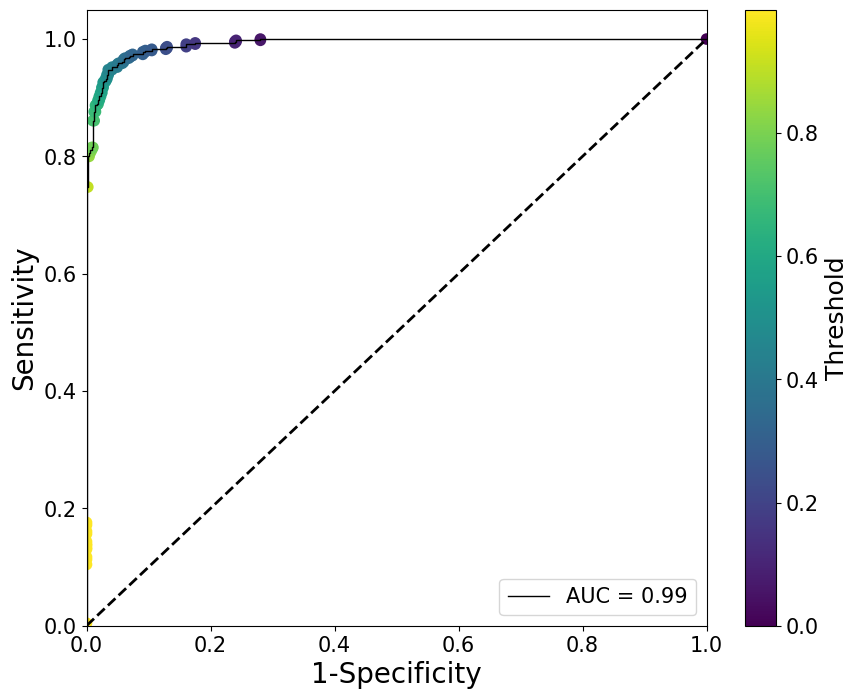

In [53]:
#ROC Curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import cm
import numpy as np


# Calculate ROC curve, AUC, and thresholds
fpr, tpr, thresholds = roc_curve(y_frame['target'], test_predictions)
roc_auc = auc(fpr, tpr)

roc_auc = auc(fpr, tpr)

# Print the AUC
print(f"AUC: {roc_auc:.4f}")

# Create the plot
plt.figure(figsize=(10, 8))
cmap = cm.get_cmap('viridis')  # Choose a colormap

# The scatter plot for the ROC points
sc = plt.scatter(fpr, tpr, c=thresholds, cmap=cmap, edgecolor='none', s =70)

# Optionally, print the thresholds alongside FPR and TPR for inspection
for f, t, thresh in zip(fpr, tpr, thresholds):
    print(f"Threshold: {thresh:.2f}, 1-Specificity: {f:.2f}, Sensitivity: {t:.2f}")

# Plotting the ROC curve
plt.plot(fpr, tpr, color='black', lw=1, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.gca().tick_params(axis='x', labelsize=15)
plt.gca().tick_params(axis='y', labelsize=15)
plt.xlabel('1-Specificity', fontsize=20)
plt.ylabel('Sensitivity', fontsize=20)


# Adding colorbar with custom font for the label
cbar = plt.colorbar(sc)
cbar.set_label('Threshold', size=18)
cbar.ax.tick_params(labelsize=15)

plt.legend(loc="lower right", fontsize= 15)
#plt.savefig('ROC LSTM.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()
